In [108]:
#all da imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [109]:
# each row is a festival screening of a film (so films shown multiple times have multiple rows)
fest_long = pd.read_csv("data/1_film-dataset_festival-program_long.csv")

# each row is a film, where the data for the first festival it was shown at listed (only one row per film)
fest_wide = pd.read_csv("data/1_film-dataset_festival-program_wide.csv")

# merge fest_wide and fest_long on "unique.id", keeping all rows from fest_wide, adding the new festivals from fest_long
fest_combined = fest_wide.merge(fest_long, on="unique.id", how="left").sort_values(by='unique.id').drop_duplicates()

fest_combined.head(10)


,unique.id,imdb.id,title.mixed,prod.year,length.min,length,prod.country.1.en,prod.country.2.en,prod.country.3.en,prod.country.4.en,...,competition,genre,fest.first,fest.sect.first,sample.year.first,fest.show.delay.3year.and.more,film.id,sample.year,fest,fest.sect
0,1,tt2917506,a story of children and film,2013.0,101.0,41 min. or longer,United Kingdom,NaN,NaN,NaN,...,0,other documentary,CANNES,Cannes Classics - Documentaries About Cinema,2013,0.0,f2081,2013,CANNES,Cannes Classics - Documentaries About Cinema
1,10,tt2852460,bends,2013.0,96.0,41 min. or longer,China,NaN,NaN,NaN,...,0,other fiction,TIFF,discovery: 2012,2012,0.0,tffnew391,2012,TIFF,discovery: 2012
2,10,tt2852460,bends,2013.0,96.0,41 min. or longer,China,NaN,NaN,NaN,...,0,other fiction,TIFF,discovery: 2012,2012,0.0,f2023,2013,CANNES,Un Certain Regard
3,100,tt0057494,a legend or was it?,1963.0,83.0,41 min. or longer,Japan,NaN,NaN,NaN,...,0,other fiction,BERLINALE,Forum,2013,1.0,f1160,2013,BERLINALE,Forum
4,1000,tt0032445,somewhere in the netherlands,1940.0,86.0,41 min. or longer,Netherlands,NaN,NaN,NaN,...,0,other fiction,BERLINALE,Retrospective,2013,1.0,f1285,2013,BERLINALE,Retrospective
5,1001,tt3613002,song,2013.0,18.0,40 min. or shorter,United States,NaN,NaN,NaN,...,0,experimental fiction,TIFF,Wavelength,2013,0.0,f3255,2013,TIFF,Wavelength
6,1002,tt3003858,song from the forest,2013.0,97.0,41 min. or longer,Germany,NaN,NaN,NaN,...,1,other documentary,IDFA,IDFA Competition for Feature-Length Documentary,2013,0.0,f6232,2013,IDFA,IDFA Competition for Feature-Length Documentary
7,1003,tt2408026,soongava—dance of the orchids,2012.0,85.0,41 min. or longer,Nepal,NaN,NaN,NaN,...,0,other fiction,FRAMELINE,"World Cinema, Queer Asian Cinema",2013,0.0,f5201,2013,FRAMELINE,"World Cinema, Queer Asian Cinema"
8,1004,tt3091254,soul,2013.0,112.0,41 min. or longer,Taiwan,NaN,NaN,NaN,...,0,other fiction,TIFF,Vanguard,2013,0.0,f3349,2013,TIFF,Vanguard
9,1005,tt2919050,soul food stories,2013.0,60.0,41 min. or longer,Bulgaria,Finland,NaN,NaN,...,1,other documentary,IDFA,IDFA Competition for Mid-Length Documentary,2013,0.0,f6233,2013,IDFA,IDFA Competition for Mid-Length Documentary


In [110]:
#  each row is an award of a given film, including nominations and wins (so films with multiple awards have multiple rows)
imdb_awards = pd.read_csv("data/3_imdb-dataset_awards_long.csv").drop_duplicates()

imdb_info = pd.read_csv("data/3_imdb-dataset_general-info_wide.csv").drop_duplicates()

imdb_combined = imdb_awards.merge(imdb_info, on="imdb.id", how="left")

imdb_combined.head(10)

,imdb.id,award.institution,imdb.event.id,award.imdb.year,awards.nom.win,award,award.category,award.person,imdb.name.id,languages,genres,rating,n.ratings,budget,openingUSA,grossUSA,grossWorld
0,tt0019760,"Cinema Eye Honors Awards, US",ev0001823,2014,Winner,Cinema Eye Honors Award,The Influentials,Dziga Vertov,nm0895048,NaN,Documentary | Music,8.4,22566.0,NaN,NaN,NaN,"$3,959"
1,tt0019760,Village Voice Film Poll,ev0002738,1999,Nominee,VVFP Award,Best Film of the Century,NaN,NaN,NaN,Documentary | Music,8.4,22566.0,NaN,NaN,NaN,"$3,959"
2,tt0024844,Village Voice Film Poll,ev0002738,1999,Nominee,VVFP Award,Best Film of the Century,NaN,NaN,French | Russian,Comedy | Drama | Romance,7.8,14485.0,NaN,NaN,NaN,"$9,505"
3,tt0025456,"National Board of Review, USA",ev0000464,1934,Winner,NBR Award,Best Foreign Film,NaN,NaN,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
4,tt0025456,"National Board of Review, USA",ev0000464,1934,Winner,NBR Award,Top Foreign Films,NaN,NaN,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
5,tt0025456,Venice Film Festival,ev0000681,1934,Winner,Mussolini Cup,Best Foreign Film,Robert J. Flaherty,nm0280904,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
6,tt0032553,"Academy Awards, USA",ev0000003,1941,Nominee,Oscar,Best Picture,NaN,NaN,English | Esperanto,Comedy | Drama | War,8.4,203026.0,"$2,000,000 (estimated)",NaN,NaN,"$969,879"
7,tt0032553,"Academy Awards, USA",ev0000003,1941,Nominee,Oscar,Best Actor in a Leading Role,Charles Chaplin,nm0000122,English | Esperanto,Comedy | Drama | War,8.4,203026.0,"$2,000,000 (estimated)",NaN,NaN,"$969,879"
8,tt0032553,"Academy Awards, USA",ev0000003,1941,Nominee,Oscar,Best Actor in a Supporting Role,Jack Oakie,nm0642988,English | Esperanto,Comedy | Drama | War,8.4,203026.0,"$2,000,000 (estimated)",NaN,NaN,"$969,879"
9,tt0032553,"Academy Awards, USA",ev0000003,1941,Nominee,Oscar,"Best Writing, Original Screenplay",Charles Chaplin,nm0000122,English | Esperanto,Comedy | Drama | War,8.4,203026.0,"$2,000,000 (estimated)",NaN,NaN,"$969,879"


In [111]:
# total rows in both dataframes
print(f"Total rows in imdb_combined: {len(imdb_combined)}")
print(f"Total rows in fest_combined: {len(fest_combined)}")
print("\n")

# percent and count of missing values in both imdb_combined and fest_combined for each column
for df, name in [(imdb_combined, "imdb_combined"), (fest_combined, "fest_combined")]:
    print(f"Missing values in {name}:")
    missing_counts = df.isnull().sum()
    missing_percents = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percents})
    print(missing_df[missing_df['missing_count'] > 0])
    print("\n")
    
    

Total rows in imdb_combined: 105599
Total rows in fest_combined: 9969


Missing values in imdb_combined:
                missing_count  missing_percent
award                       3         0.002841
award.category          13987        13.245391
award.person            10078         9.543651
imdb.name.id            10078         9.543651
languages               13683        12.957509
genres                  12154        11.509579
rating                  12875        12.192350
n.ratings               12875        12.192350
budget                  60651        57.435203
openingUSA              51519        48.787394
grossUSA                49621        46.990028
grossWorld              35762        33.865851


Missing values in fest_combined:
                                missing_count  missing_percent
imdb.id                                  1497        15.016551
prod.year                                 179         1.795566
length.min                                306         3.0695

In [112]:
#drop columns with more than 60% missing values in both dataframes
threshold = 60.0
for df in [imdb_combined, fest_combined]:
    missing_percents = (df.isnull().sum() / len(df)) * 100
    cols_to_drop = missing_percents[missing_percents > threshold].index
    df.drop(columns=cols_to_drop, inplace=True)
    
print("Columns after dropping those with >60% missing values:")
print(f"fest_combined columns: {fest_combined.columns.tolist()}")
print(f"imdb_combined columns: {imdb_combined.columns.tolist()}")

imdb_combined.head(7)

Columns after dropping those with >60% missing values:
fest_combined columns: ['unique.id', 'imdb.id', 'title.mixed', 'prod.year', 'length.min', 'length', 'prod.country.1.en', 'regions.mena', 'regions.africa', 'regions.asia', 'regions.na', 'regions.eu', 'regions.la', 'regions.ocean', 'director.1', 'animt', 'doc', 'exp', 'fict', 'lgbtq', 'imdb.fest', 'retro.fest.sect', 'competition', 'genre', 'fest.first', 'fest.sect.first', 'sample.year.first', 'fest.show.delay.3year.and.more', 'film.id', 'sample.year', 'fest', 'fest.sect']
imdb_combined columns: ['imdb.id', 'award.institution', 'imdb.event.id', 'award.imdb.year', 'awards.nom.win', 'award', 'award.category', 'award.person', 'imdb.name.id', 'languages', 'genres', 'rating', 'n.ratings', 'budget', 'openingUSA', 'grossUSA', 'grossWorld']


,imdb.id,award.institution,imdb.event.id,award.imdb.year,awards.nom.win,award,award.category,award.person,imdb.name.id,languages,genres,rating,n.ratings,budget,openingUSA,grossUSA,grossWorld
0,tt0019760,"Cinema Eye Honors Awards, US",ev0001823,2014,Winner,Cinema Eye Honors Award,The Influentials,Dziga Vertov,nm0895048,NaN,Documentary | Music,8.4,22566.0,NaN,NaN,NaN,"$3,959"
1,tt0019760,Village Voice Film Poll,ev0002738,1999,Nominee,VVFP Award,Best Film of the Century,NaN,NaN,NaN,Documentary | Music,8.4,22566.0,NaN,NaN,NaN,"$3,959"
2,tt0024844,Village Voice Film Poll,ev0002738,1999,Nominee,VVFP Award,Best Film of the Century,NaN,NaN,French | Russian,Comedy | Drama | Romance,7.8,14485.0,NaN,NaN,NaN,"$9,505"
3,tt0025456,"National Board of Review, USA",ev0000464,1934,Winner,NBR Award,Best Foreign Film,NaN,NaN,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
4,tt0025456,"National Board of Review, USA",ev0000464,1934,Winner,NBR Award,Top Foreign Films,NaN,NaN,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
5,tt0025456,Venice Film Festival,ev0000681,1934,Winner,Mussolini Cup,Best Foreign Film,Robert J. Flaherty,nm0280904,English,Documentary,7.3,1964.0,NaN,NaN,NaN,NaN
6,tt0032553,"Academy Awards, USA",ev0000003,1941,Nominee,Oscar,Best Picture,NaN,NaN,English | Esperanto,Comedy | Drama | War,8.4,203026.0,"$2,000,000 (estimated)",NaN,NaN,"$969,879"


In [113]:
fest_cleaned = fest_combined.drop(columns=['title.mixed', 'length.min', 'director.1', 'film.id', 'sample.year'])
imdb_cleaned = imdb_combined.drop(columns=['imdb.event.id', 'award.person', 'imdb.name.id', 'n.ratings'])

imdb_cleaned['grossUSA'] = imdb_cleaned['grossUSA'].str.replace(r'[$,]', '', regex=True).astype(float)
imdb_cleaned['grossWorld'] = pd.to_numeric(imdb_cleaned['grossWorld'].str.replace(r'[$,]', '', regex=True), errors='coerce')

imdb_cleaned.head(7)

,imdb.id,award.institution,award.imdb.year,awards.nom.win,award,award.category,languages,genres,rating,budget,openingUSA,grossUSA,grossWorld
0,tt0019760,"Cinema Eye Honors Awards, US",2014,Winner,Cinema Eye Honors Award,The Influentials,NaN,Documentary | Music,8.4,NaN,NaN,NaN,3959.0
1,tt0019760,Village Voice Film Poll,1999,Nominee,VVFP Award,Best Film of the Century,NaN,Documentary | Music,8.4,NaN,NaN,NaN,3959.0
2,tt0024844,Village Voice Film Poll,1999,Nominee,VVFP Award,Best Film of the Century,French | Russian,Comedy | Drama | Romance,7.8,NaN,NaN,NaN,9505.0
3,tt0025456,"National Board of Review, USA",1934,Winner,NBR Award,Best Foreign Film,English,Documentary,7.3,NaN,NaN,NaN,NaN
4,tt0025456,"National Board of Review, USA",1934,Winner,NBR Award,Top Foreign Films,English,Documentary,7.3,NaN,NaN,NaN,NaN
5,tt0025456,Venice Film Festival,1934,Winner,Mussolini Cup,Best Foreign Film,English,Documentary,7.3,NaN,NaN,NaN,NaN
6,tt0032553,"Academy Awards, USA",1941,Nominee,Oscar,Best Picture,English | Esperanto,Comedy | Drama | War,8.4,"$2,000,000 (estimated)",NaN,NaN,969879.0


In [114]:
for column in imdb_cleaned.columns:
    print(f"Unique values in column '{column}':")
    print(imdb_cleaned[column].nunique())
    
print("====================================\n")

for column in fest_cleaned.columns:
    print(f"Unique values in column '{column}':")
    print(fest_cleaned[column].nunique())


Unique values in column 'imdb.id':
5976
Unique values in column 'award.institution':
2374
Unique values in column 'award.imdb.year':
83
Unique values in column 'awards.nom.win':
2
Unique values in column 'award':
4211
Unique values in column 'award.category':
5855
Unique values in column 'languages':
964
Unique values in column 'genres':
844
Unique values in column 'rating':
64
Unique values in column 'budget':
587
Unique values in column 'openingUSA':
1188
Unique values in column 'grossUSA':
1283
Unique values in column 'grossWorld':
2158

Unique values in column 'unique.id':
9348
Unique values in column 'imdb.id':
7830
Unique values in column 'prod.year':
101
Unique values in column 'length':
3
Unique values in column 'prod.country.1.en':
137
Unique values in column 'regions.mena':
2
Unique values in column 'regions.africa':
2
Unique values in column 'regions.asia':
2
Unique values in column 'regions.na':
2
Unique values in column 'regions.eu':
2
Unique values in column 'regions.la':

In [115]:
#fest -- participation in the festival predicts gross revenue?
fest_important = fest_cleaned[['imdb.id', 'fest.first', 'fest.sect.first', 'fest', 'fest.sect']]

#imdb -- awards/nominations predict gross revenue?
imdb_important = imdb_cleaned[['imdb.id', 'award.institution', 'awards.nom.win', 'award', 'award.category', 'grossUSA', 'grossWorld']]

fest_imdb = fest_important.merge(imdb_important, on="imdb.id", how="inner").sort_values(by='imdb.id').drop_duplicates()

print(fest_imdb.shape)
print(fest_imdb['grossUSA'].isna().value_counts())
print(fest_imdb['grossWorld'].isna().value_counts())

fest_imdb.head(10)

(84581, 11)
grossUSA
False    48710
True     35871
Name: count, dtype: int64
grossWorld
False    59885
True     24696
Name: count, dtype: int64


,imdb.id,fest.first,fest.sect.first,fest,fest.sect,award.institution,awards.nom.win,award,award.category,grossUSA,grossWorld
29073,tt0014429,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,"National Film Preservation Board, USA",Winner,National Film Registry,NaN,NaN,NaN
2158,tt0017925,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,"National Film Preservation Board, USA",Winner,National Film Registry,NaN,NaN,NaN
2159,tt0017925,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,Online Film & Television Association,Winner,OFTA Film Hall of Fame,Motion Picture,NaN,NaN
78297,tt0019760,IDFA,Top 10,IDFA,Top 10,"Cinema Eye Honors Awards, US",Winner,Cinema Eye Honors Award,The Influentials,NaN,3959.0
78298,tt0019760,IDFA,Top 10,IDFA,Top 10,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,3959.0
30115,tt0024844,CANNES,cannes classics,CANNES,cannes classics,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,9505.0
83439,tt0025456,IDFA,Top 10,IDFA,Top 10,"National Board of Review, USA",Winner,NBR Award,Best Foreign Film,NaN,NaN
83440,tt0025456,IDFA,Top 10,IDFA,Top 10,"National Board of Review, USA",Winner,NBR Award,Top Foreign Films,NaN,NaN
83441,tt0025456,IDFA,Top 10,IDFA,Top 10,Venice Film Festival,Winner,Mussolini Cup,Best Foreign Film,NaN,NaN
480,tt0026714,BERLINALE,Retrospective,BERLINALE,Retrospective,"Academy Awards, USA",Nominee,Oscar,Best Assistant Director,NaN,NaN


In [116]:
# count award wins and nominations per film 
# RUN ONLY ONCE OR ELSE WILL MERGE MULTIPLE TIMES
award_counts = imdb_important.groupby(['imdb.id', 'awards.nom.win']).size().unstack(fill_value=0).reset_index()
fest_imdb = fest_imdb.merge(award_counts, on='imdb.id', how='left')
fest_imdb['award_and_noms'] = fest_imdb['Nominee'] + fest_imdb['Winner']

fest_imdb.head(10)

,imdb.id,fest.first,fest.sect.first,fest,fest.sect,award.institution,awards.nom.win,award,award.category,grossUSA,grossWorld,Nominee,Winner,award_and_noms
0,tt0014429,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,"National Film Preservation Board, USA",Winner,National Film Registry,NaN,NaN,NaN,0,1,1
1,tt0017925,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,"National Film Preservation Board, USA",Winner,National Film Registry,NaN,NaN,NaN,0,2,2
2,tt0017925,CANNES,Cinéma De La Plage,CANNES,Cinéma De La Plage,Online Film & Television Association,Winner,OFTA Film Hall of Fame,Motion Picture,NaN,NaN,0,2,2
3,tt0019760,IDFA,Top 10,IDFA,Top 10,"Cinema Eye Honors Awards, US",Winner,Cinema Eye Honors Award,The Influentials,NaN,3959.0,1,1,2
4,tt0019760,IDFA,Top 10,IDFA,Top 10,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,3959.0,1,1,2
5,tt0024844,CANNES,cannes classics,CANNES,cannes classics,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,9505.0,1,0,1
6,tt0025456,IDFA,Top 10,IDFA,Top 10,"National Board of Review, USA",Winner,NBR Award,Best Foreign Film,NaN,NaN,0,3,3
7,tt0025456,IDFA,Top 10,IDFA,Top 10,"National Board of Review, USA",Winner,NBR Award,Top Foreign Films,NaN,NaN,0,3,3
8,tt0025456,IDFA,Top 10,IDFA,Top 10,Venice Film Festival,Winner,Mussolini Cup,Best Foreign Film,NaN,NaN,0,3,3
9,tt0026714,BERLINALE,Retrospective,BERLINALE,Retrospective,"Academy Awards, USA",Nominee,Oscar,Best Assistant Director,NaN,NaN,2,2,4


In [117]:
fest_imdb_dropUSA = fest_imdb.dropna(subset=['grossUSA'])
print(fest_imdb_dropUSA.shape)

fest_imdb_dropWorld = fest_imdb.dropna(subset=['grossWorld'])
print(fest_imdb_dropWorld.shape)

fest_imdb_dropWorld.head(10)

(48710, 14)
(59885, 14)


,imdb.id,fest.first,fest.sect.first,fest,fest.sect,award.institution,awards.nom.win,award,award.category,grossUSA,grossWorld,Nominee,Winner,award_and_noms
3,tt0019760,IDFA,Top 10,IDFA,Top 10,"Cinema Eye Honors Awards, US",Winner,Cinema Eye Honors Award,The Influentials,NaN,3959.0,1,1,2
4,tt0019760,IDFA,Top 10,IDFA,Top 10,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,3959.0,1,1,2
5,tt0024844,CANNES,cannes classics,CANNES,cannes classics,Village Voice Film Poll,Nominee,VVFP Award,Best Film of the Century,NaN,9505.0,1,0,1
22,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"Academy Awards, USA",Nominee,Oscar,"Best Music, Original Score",NaN,969879.0,5,6,11
23,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,Jussi Awards,Winner,Jussi,Best Foreign Filmmaker,NaN,969879.0,5,6,11
24,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"Academy Awards, USA",Nominee,Oscar,"Best Writing, Original Screenplay",NaN,969879.0,5,6,11
25,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"Academy Awards, USA",Nominee,Oscar,Best Actor in a Supporting Role,NaN,969879.0,5,6,11
26,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"National Board of Review, USA",Winner,NBR Award,Top Ten Films,NaN,969879.0,5,6,11
27,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"Academy Awards, USA",Nominee,Oscar,Best Picture,NaN,969879.0,5,6,11
28,tt0032553,CANNES,cinema de la plague,CANNES,cinema de la plague,"National Film Preservation Board, USA",Winner,National Film Registry,NaN,NaN,969879.0,5,6,11


# Trying to Identify a Relationship

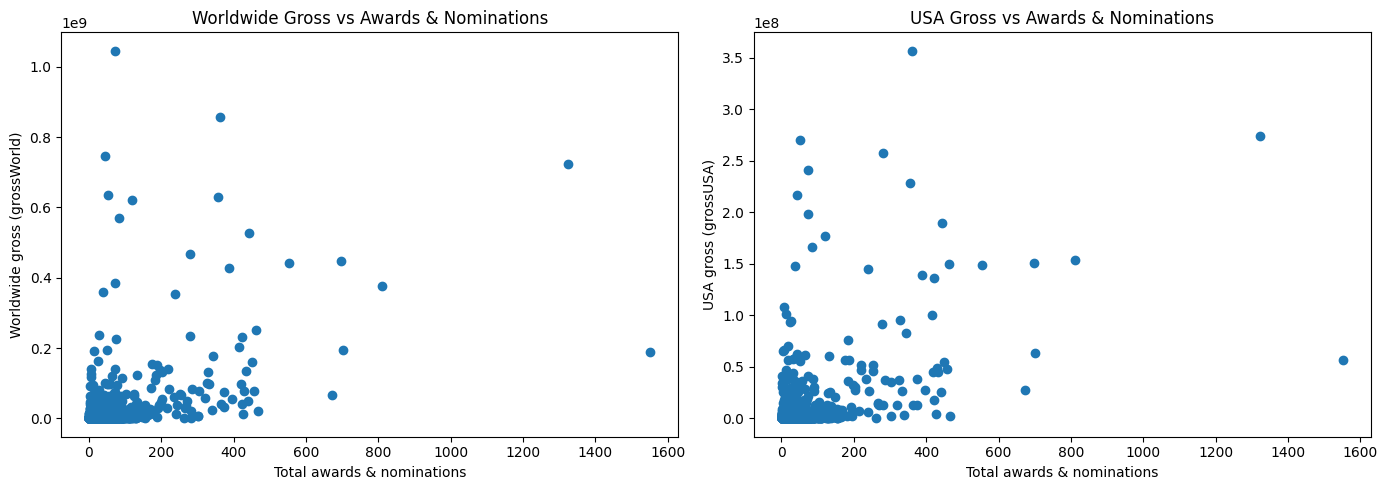

In [118]:
######## Awards and Nominations Together ########

# -------- Prepare the two datasets --------
win_noms_world = (
    fest_imdb[['imdb.id', 'grossWorld', 'award_and_noms']]
    .drop_duplicates()
    .dropna(subset=['grossWorld', 'award_and_noms'])
)

win_noms_usa = (
    fest_imdb[['imdb.id', 'grossUSA', 'award_and_noms']]
    .drop_duplicates()
    .dropna(subset=['grossUSA', 'award_and_noms'])
)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(win_noms_world['award_and_noms'], win_noms_world['grossWorld'])
axes[0].set_xlabel('Total awards & nominations')
axes[0].set_ylabel('Worldwide gross (grossWorld)')
axes[0].set_title('Worldwide Gross vs Awards & Nominations')

# RIGHT PLOT — USA Gross
axes[1].scatter(win_noms_usa['award_and_noms'], win_noms_usa['grossUSA'])
axes[1].set_xlabel('Total awards & nominations')
axes[1].set_ylabel('USA gross (grossUSA)')
axes[1].set_title('USA Gross vs Awards & Nominations')

plt.tight_layout()
plt.show()


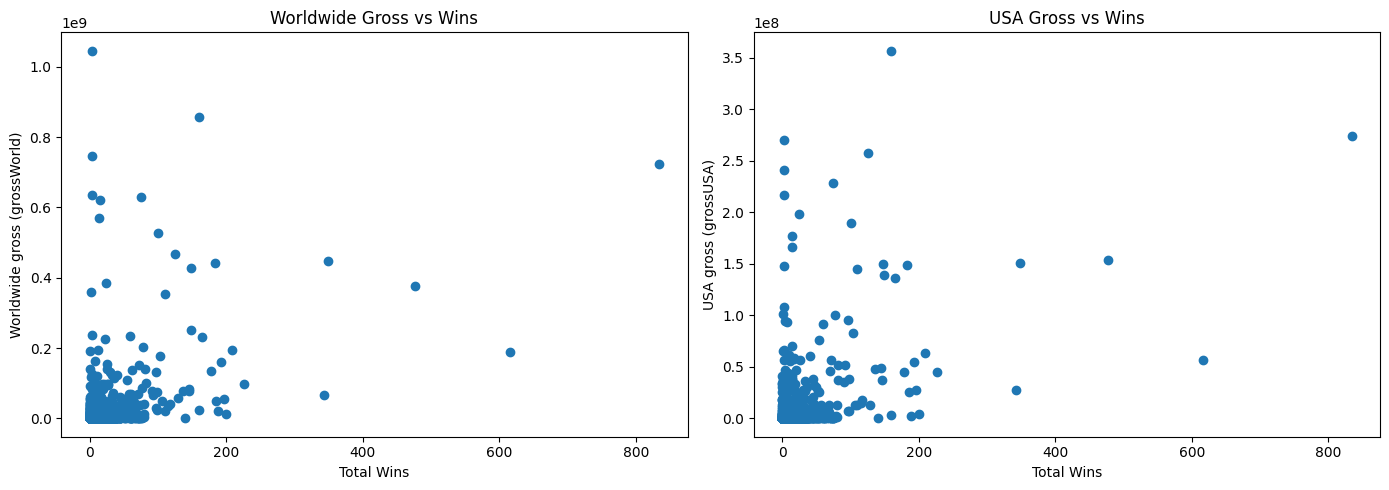

In [119]:
######## Just Winners ########
# -------- Prepare the two datasets --------
win_world = (
    fest_imdb[['imdb.id', 'grossWorld', 'Winner']]
    .drop_duplicates()
    .dropna(subset=['grossWorld', 'Winner'])
)

win_usa = (
    fest_imdb[['imdb.id', 'grossUSA', 'Winner']]
    .drop_duplicates()
    .dropna(subset=['grossUSA', 'Winner'])
)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(win_world['Winner'], win_world['grossWorld'])
axes[0].set_xlabel('Total Wins')
axes[0].set_ylabel('Worldwide gross (grossWorld)')
axes[0].set_title('Worldwide Gross vs Wins')

# RIGHT PLOT — USA Gross
axes[1].scatter(win_usa['Winner'], win_usa['grossUSA'])
axes[1].set_xlabel('Total Wins')
axes[1].set_ylabel('USA gross (grossUSA)')
axes[1].set_title('USA Gross vs Wins')

plt.tight_layout()
plt.show()

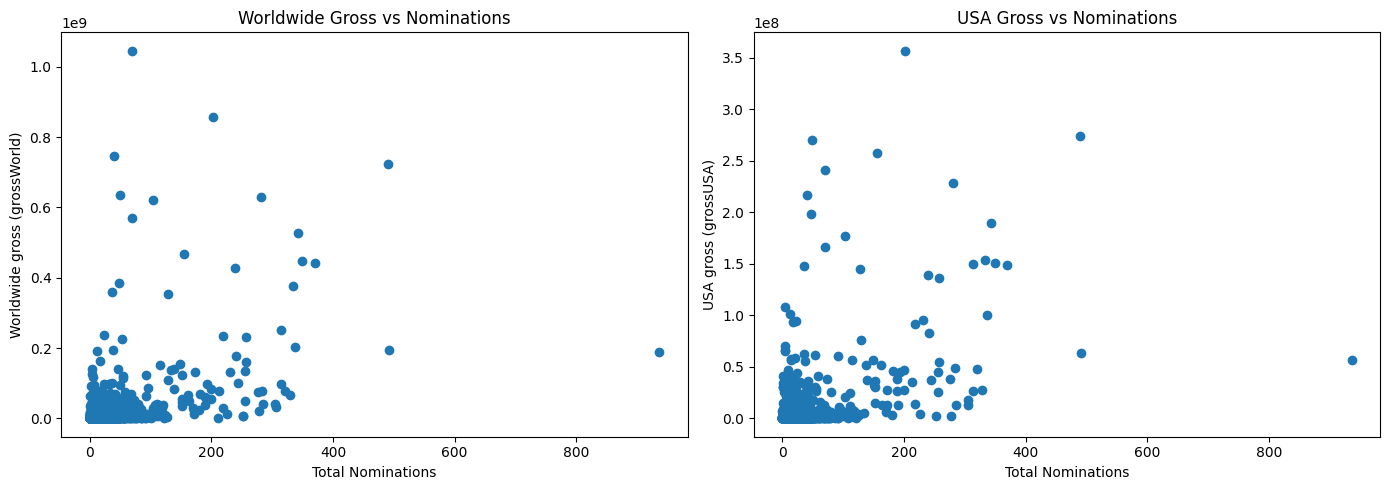

In [120]:
######## Just Nominations ########
# -------- Prepare the two datasets --------
noms_world = (
    fest_imdb[['imdb.id', 'grossWorld', 'Nominee']]
    .drop_duplicates()
    .dropna(subset=['grossWorld', 'Nominee'])
)

noms_usa = (
    fest_imdb[['imdb.id', 'grossUSA', 'Nominee']]
    .drop_duplicates()
    .dropna(subset=['grossUSA', 'Nominee'])
)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(noms_world['Nominee'], noms_world['grossWorld'])
axes[0].set_xlabel('Total Nominations')
axes[0].set_ylabel('Worldwide gross (grossWorld)')
axes[0].set_title('Worldwide Gross vs Nominations')

# RIGHT PLOT — USA Gross
axes[1].scatter(noms_usa['Nominee'], noms_usa['grossUSA'])
axes[1].set_xlabel('Total Nominations')
axes[1].set_ylabel('USA gross (grossUSA)')
axes[1].set_title('USA Gross vs Nominations')

plt.tight_layout()
plt.show()

# Trying Log Scale for the same figures above
There are large outliers and the scaling is hiding the trends

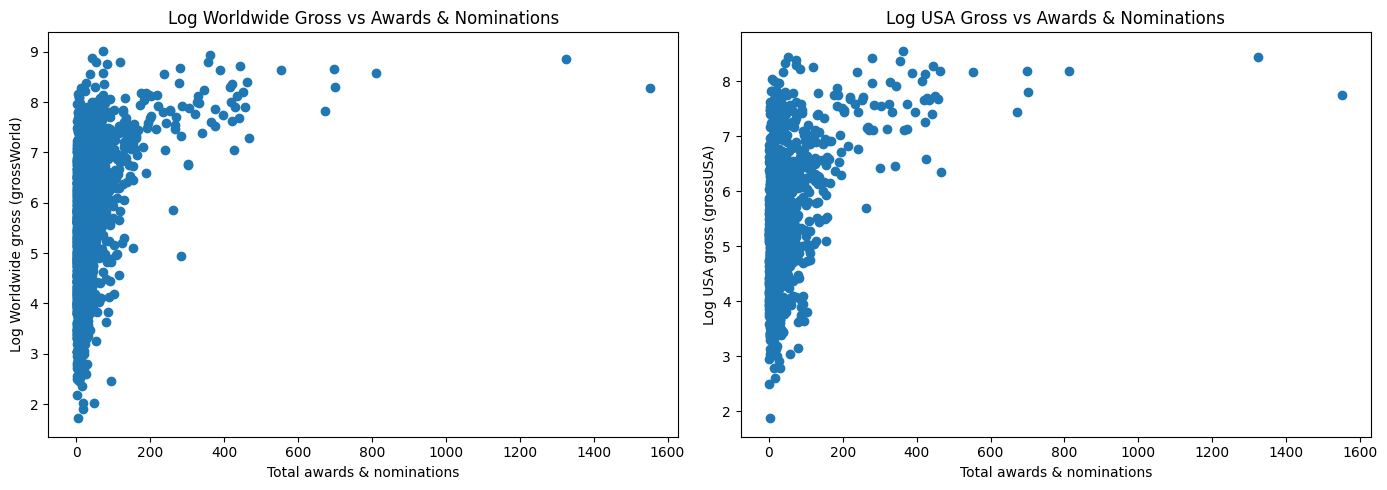

In [121]:
######## Awards and Nominations Together ########
# -------- Prepare the two datasets --------

win_noms_world['log_grossWorld'] = np.log10(win_noms_world['grossWorld'] + 1)
win_noms_usa['log_grossUSA'] = np.log10(win_noms_usa['grossUSA'] + 1)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(win_noms_world['award_and_noms'], win_noms_world['log_grossWorld'])
axes[0].set_xlabel('Total awards & nominations')
axes[0].set_ylabel('Log Worldwide gross (grossWorld)')
axes[0].set_title('Log Worldwide Gross vs Awards & Nominations')

# RIGHT PLOT — USA Gross
axes[1].scatter(win_noms_usa['award_and_noms'], win_noms_usa['log_grossUSA'])
axes[1].set_xlabel('Total awards & nominations')
axes[1].set_ylabel('Log USA gross (grossUSA)')
axes[1].set_title('Log USA Gross vs Awards & Nominations')

plt.tight_layout()
plt.show()


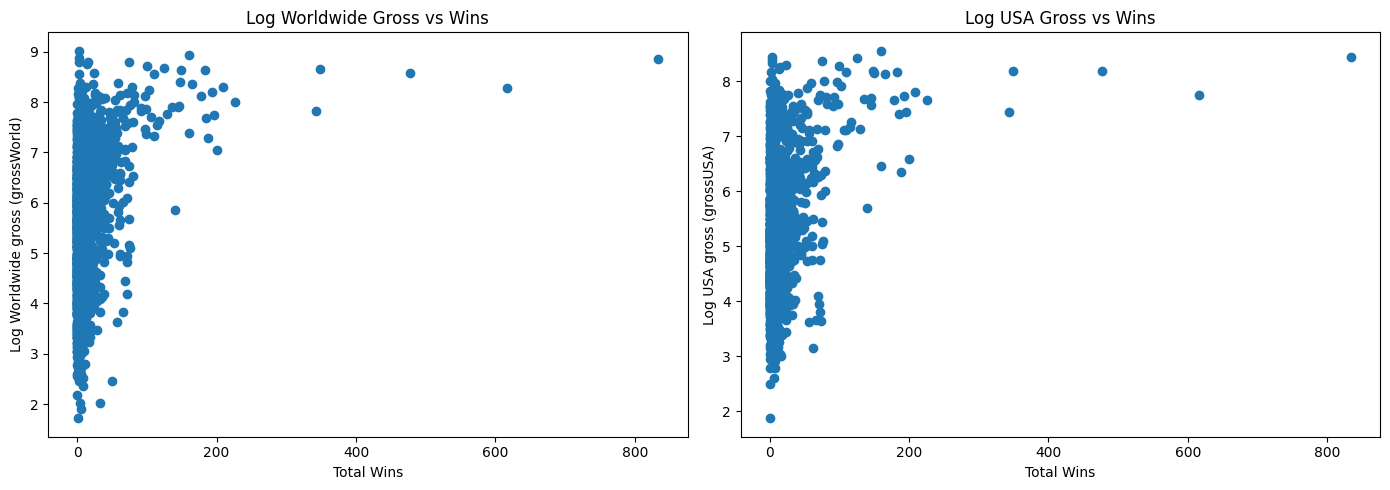

In [122]:
######## Just Winners ########
# -------- Prepare the two datasets --------
win_world['log_grossWorld'] = np.log10(win_world['grossWorld'] + 1)
win_usa['log_grossUSA'] = np.log10(win_usa['grossUSA'] + 1)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(win_world['Winner'], win_world['log_grossWorld'])
axes[0].set_xlabel('Total Wins')
axes[0].set_ylabel('Log Worldwide gross (grossWorld)')
axes[0].set_title('Log Worldwide Gross vs Wins')

# RIGHT PLOT — USA Gross
axes[1].scatter(win_usa['Winner'], win_usa['log_grossUSA'])
axes[1].set_xlabel('Total Wins')
axes[1].set_ylabel('Log USA gross (grossUSA)')
axes[1].set_title('Log USA Gross vs Wins')

plt.tight_layout()
plt.show()

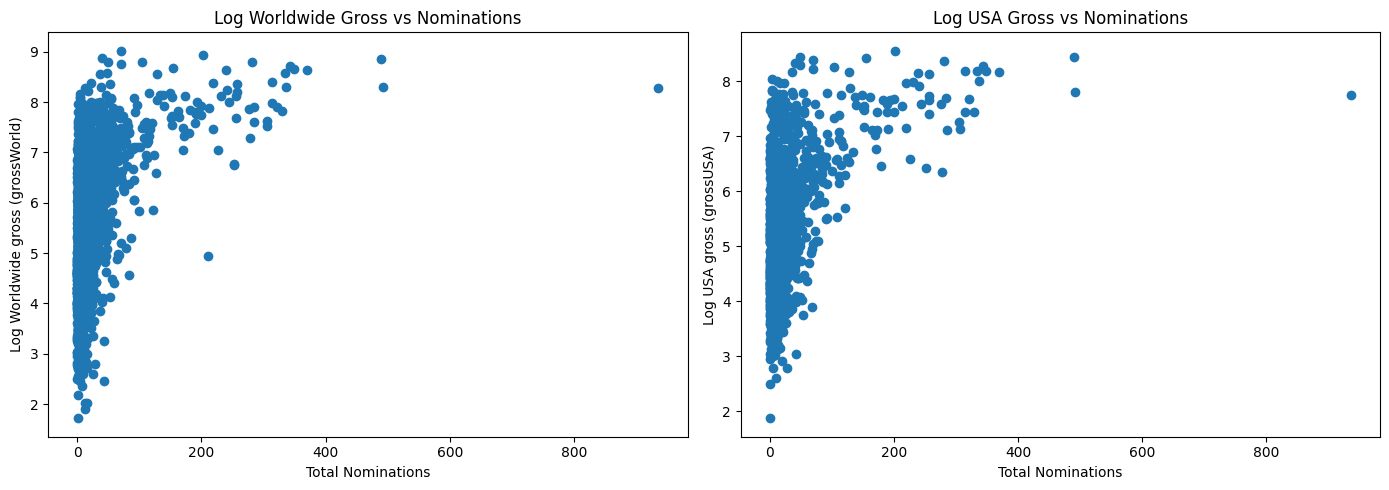

In [123]:
######## Just Nominations ########
# -------- Prepare the two datasets --------
noms_world['log_grossWorld'] = np.log10(noms_world['grossWorld'] + 1)
noms_usa['log_grossUSA'] = np.log10(noms_usa['grossUSA'] + 1)

# ---------------- SIDE-BY-SIDE PLOTS ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT PLOT — Worldwide Gross
axes[0].scatter(noms_world['Nominee'], noms_world['log_grossWorld'])
axes[0].set_xlabel('Total Nominations')
axes[0].set_ylabel('Log Worldwide gross (grossWorld)')
axes[0].set_title('Log Worldwide Gross vs Nominations')

# RIGHT PLOT — USA Gross
axes[1].scatter(noms_usa['Nominee'], noms_usa['log_grossUSA'])
axes[1].set_xlabel('Total Nominations')
axes[1].set_ylabel('Log USA gross (grossUSA)')
axes[1].set_title('Log USA Gross vs Nominations')

plt.tight_layout()
plt.show()

# Remove extreme outliers & Lowess Trend Line

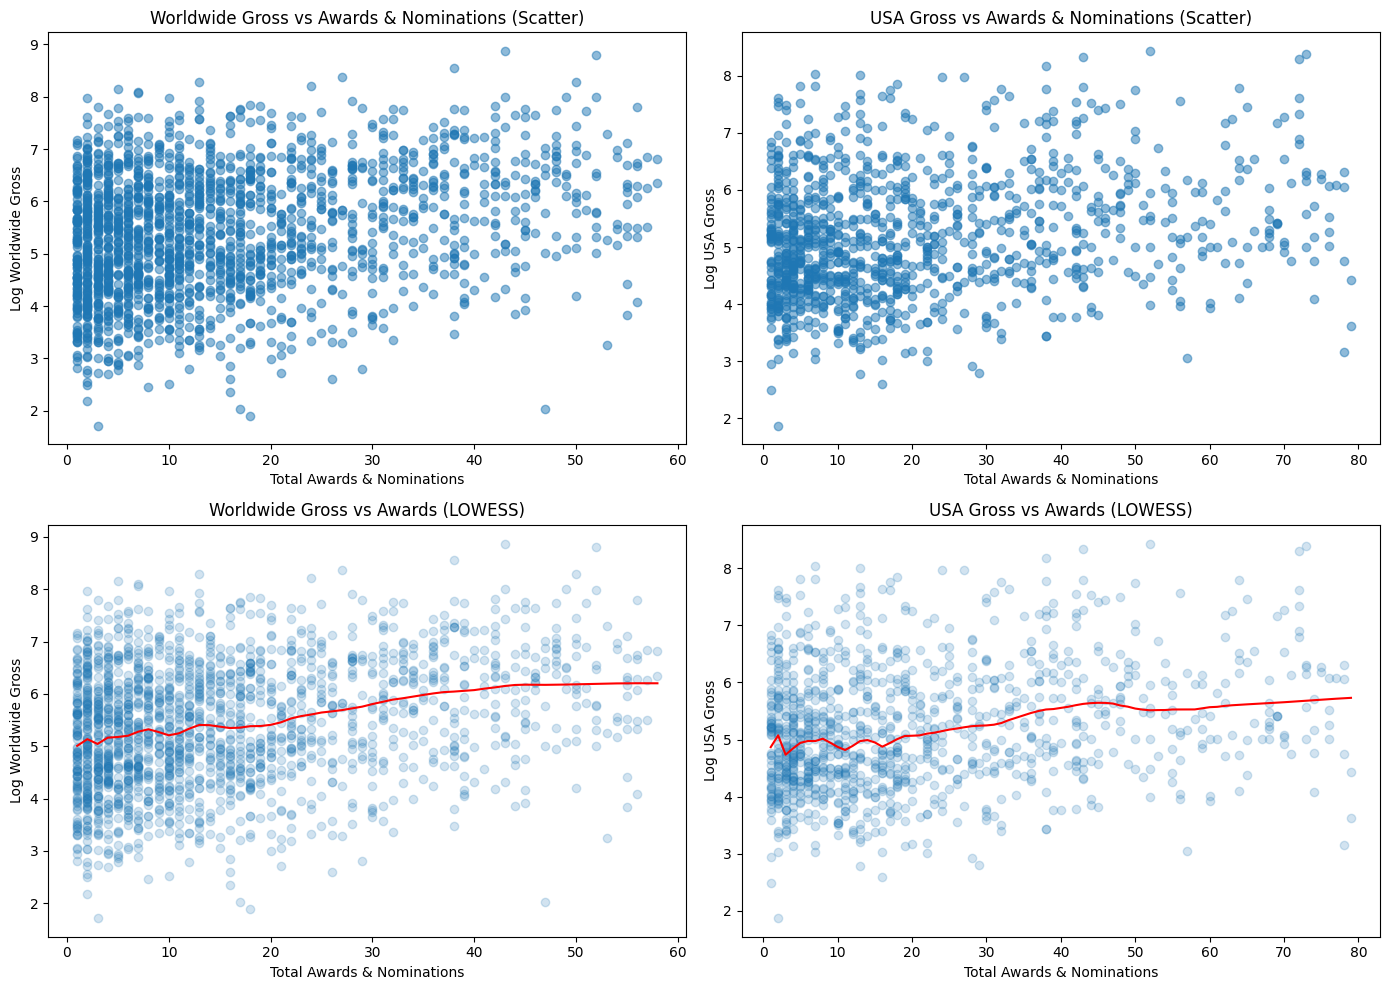

In [142]:
######## Awards and Nominations Together ########

upper_World = win_noms_world['award_and_noms'].quantile(0.95)
upper_USA = win_noms_usa['award_and_noms'].quantile(0.95)

win_noms_world = win_noms_world[win_noms_world['award_and_noms'] <= upper_World]
win_noms_usa = win_noms_usa[win_noms_usa['award_and_noms'] <= upper_USA]

# ---------- CREATE 2x2 SUBPLOTS ----------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ---- TOP LEFT: WORLDWIDE SCATTER ----
axes[0, 0].scatter(win_noms_world['award_and_noms'], win_noms_world['log_grossWorld'], alpha=0.5)
axes[0, 0].set_title("Worldwide Gross vs Awards & Nominations (Scatter)")
axes[0, 0].set_xlabel("Total Awards & Nominations")
axes[0, 0].set_ylabel("Log Worldwide Gross")

# ---- TOP RIGHT: USA SCATTER ----
axes[0, 1].scatter(win_noms_usa['award_and_noms'], win_noms_usa['log_grossUSA'], alpha=0.5)
axes[0, 1].set_title("USA Gross vs Awards & Nominations (Scatter)")
axes[0, 1].set_xlabel("Total Awards & Nominations")
axes[0, 1].set_ylabel("Log USA Gross")

# ---- BOTTOM LEFT: WORLDWIDE LOWESS ----
low_world = lowess(win_noms_world['log_grossWorld'], win_noms_world['award_and_noms'], frac=0.15)
axes[1, 0].scatter(win_noms_world['award_and_noms'], win_noms_world['log_grossWorld'], alpha=0.2)
axes[1, 0].plot(low_world[:, 0], low_world[:, 1], color='red')
axes[1, 0].set_title("Worldwide Gross vs Awards (LOWESS)")
axes[1, 0].set_xlabel("Total Awards & Nominations")
axes[1, 0].set_ylabel("Log Worldwide Gross")

# ---- BOTTOM RIGHT: USA LOWESS ----
low_usa = lowess(win_noms_usa['log_grossUSA'], win_noms_usa['award_and_noms'], frac=0.15)
axes[1, 1].scatter(win_noms_usa['award_and_noms'], win_noms_usa['log_grossUSA'], alpha=0.2)
axes[1, 1].plot(low_usa[:, 0], low_usa[:, 1], color='red')
axes[1, 1].set_title("USA Gross vs Awards (LOWESS)")
axes[1, 1].set_xlabel("Total Awards & Nominations")
axes[1, 1].set_ylabel("Log USA Gross")

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


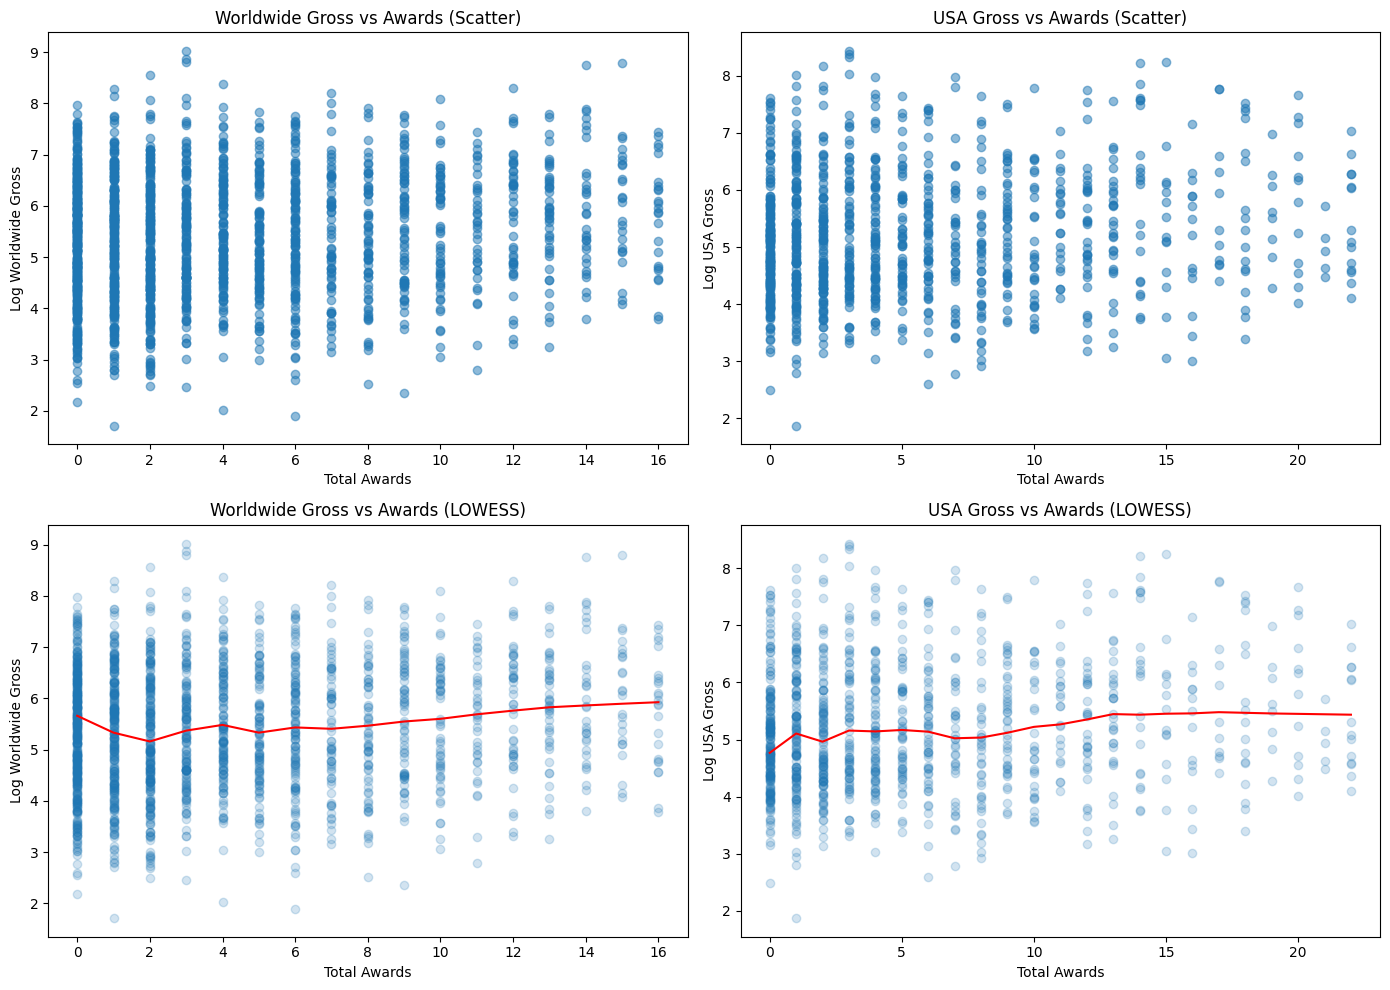

In [144]:
######## Just Winners ########

upper_World = win_world['Winner'].quantile(0.95)
upper_USA = win_usa['Winner'].quantile(0.95)

win_world = win_world[win_world['Winner'] <= upper_World]
win_usa = win_usa[win_usa['Winner'] <= upper_USA]

# ---------- CREATE 2x2 SUBPLOTS ----------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ---- TOP LEFT: WORLDWIDE SCATTER ----
axes[0, 0].scatter(win_world['Winner'], win_world['log_grossWorld'], alpha=0.5)
axes[0, 0].set_title("Worldwide Gross vs Awards (Scatter)")
axes[0, 0].set_xlabel("Total Awards")
axes[0, 0].set_ylabel("Log Worldwide Gross")

# ---- TOP RIGHT: USA SCATTER ----
axes[0, 1].scatter(win_usa['Winner'], win_usa['log_grossUSA'], alpha=0.5)
axes[0, 1].set_title("USA Gross vs Awards (Scatter)")
axes[0, 1].set_xlabel("Total Awards")
axes[0, 1].set_ylabel("Log USA Gross")

# ---- BOTTOM LEFT: WORLDWIDE LOWESS ----
low_world = lowess(win_world['log_grossWorld'], win_world['Winner'], frac=0.15)
axes[1, 0].scatter(win_world['Winner'], win_world['log_grossWorld'], alpha=0.2)
axes[1, 0].plot(low_world[:, 0], low_world[:, 1], color='red')
axes[1, 0].set_title("Worldwide Gross vs Awards (LOWESS)")
axes[1, 0].set_xlabel("Total Awards")
axes[1, 0].set_ylabel("Log Worldwide Gross")

# ---- BOTTOM RIGHT: USA LOWESS ----
low_usa = lowess(win_usa['log_grossUSA'], win_usa['Winner'], frac=0.15)
axes[1, 1].scatter(win_usa['Winner'], win_usa['log_grossUSA'], alpha=0.2)
axes[1, 1].plot(low_usa[:, 0], low_usa[:, 1], color='red')
axes[1, 1].set_title("USA Gross vs Awards (LOWESS)")
axes[1, 1].set_xlabel("Total Awards")
axes[1, 1].set_ylabel("Log USA Gross")

plt.tight_layout()
plt.show()

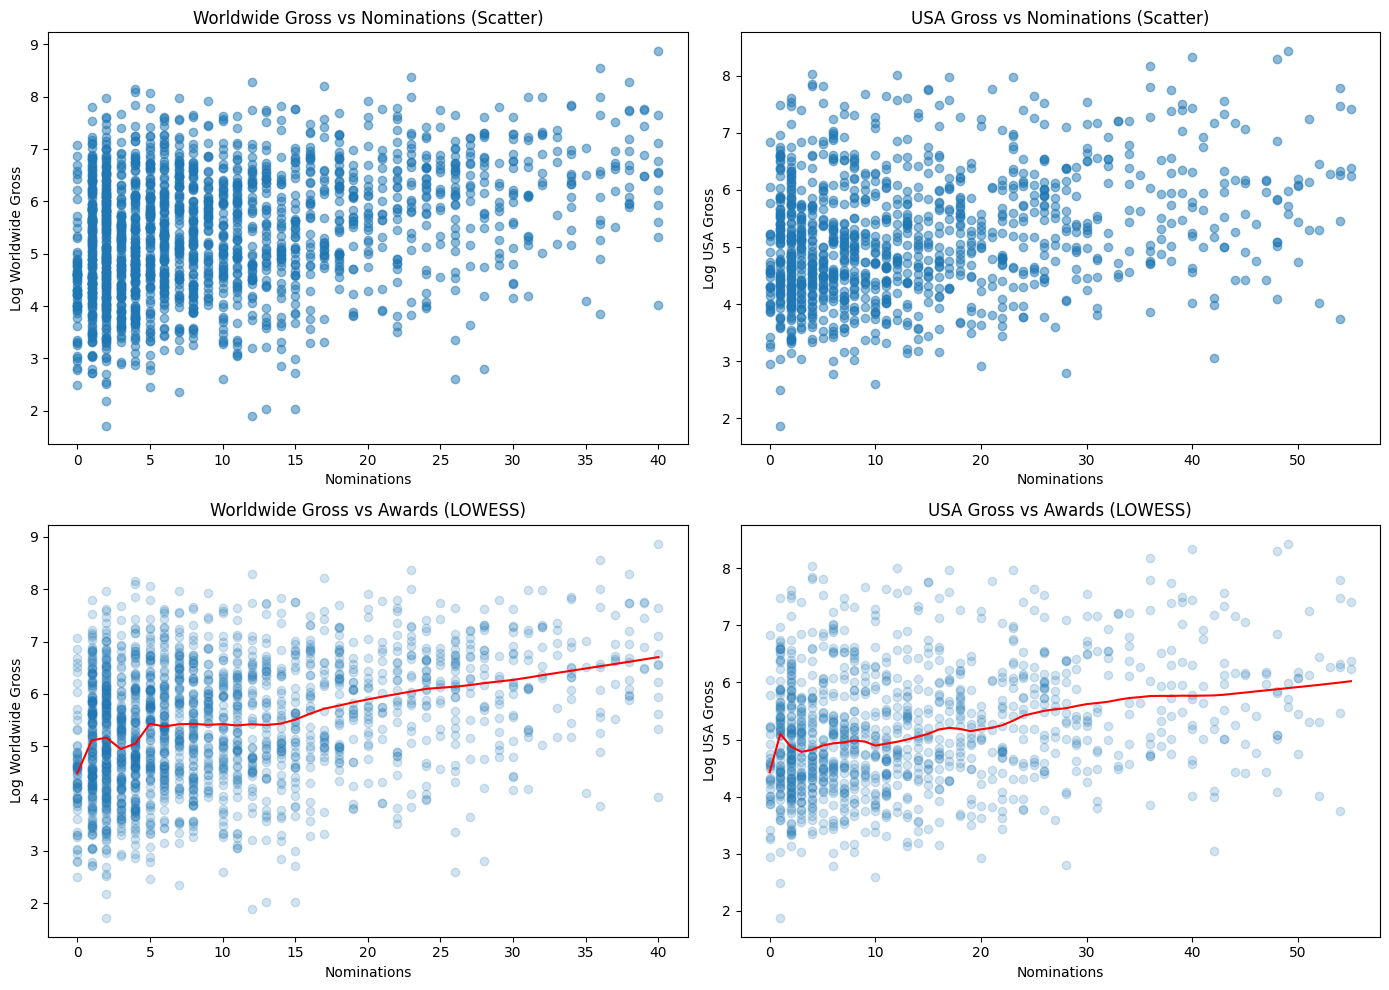

In [141]:
######## Just Nominations ########

upper_World = noms_world['Nominee'].quantile(0.95)
upper_USA = noms_usa['Nominee'].quantile(0.95)

noms_world = noms_world[noms_world['Nominee'] <= upper_World]
noms_usa = noms_usa[noms_usa['Nominee'] <= upper_USA]

# ---------- CREATE 2x2 SUBPLOTS ----------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ---- TOP LEFT: WORLDWIDE SCATTER ----
axes[0, 0].scatter(noms_world['Nominee'], noms_world['log_grossWorld'], alpha=0.5)
axes[0, 0].set_title("Worldwide Gross vs Nominations (Scatter)")
axes[0, 0].set_xlabel("Nominations")
axes[0, 0].set_ylabel("Log Worldwide Gross")

# ---- TOP RIGHT: USA SCATTER ----
axes[0, 1].scatter(noms_usa['Nominee'], noms_usa['log_grossUSA'], alpha=0.5)
axes[0, 1].set_title("USA Gross vs Nominations (Scatter)")
axes[0, 1].set_xlabel("Nominations")
axes[0, 1].set_ylabel("Log USA Gross")

# ---- BOTTOM LEFT: WORLDWIDE LOWESS ----
low_world = lowess(noms_world['log_grossWorld'], noms_world['Nominee'], frac=0.15)
axes[1, 0].scatter(noms_world['Nominee'], noms_world['log_grossWorld'], alpha=0.2)
axes[1, 0].plot(low_world[:, 0], low_world[:, 1], color='red')
axes[1, 0].set_title("Worldwide Gross vs Awards (LOWESS)")
axes[1, 0].set_xlabel("Nominations")
axes[1, 0].set_ylabel("Log Worldwide Gross")

# ---- BOTTOM RIGHT: USA LOWESS ----
low_usa = lowess(noms_usa['log_grossUSA'], noms_usa['Nominee'], frac=0.15)
axes[1, 1].scatter(noms_usa['Nominee'], noms_usa['log_grossUSA'], alpha=0.2)
axes[1, 1].plot(low_usa[:, 0], low_usa[:, 1], color='red')
axes[1, 1].set_title("USA Gross vs Awards (LOWESS)")
axes[1, 1].set_xlabel("Nominations")
axes[1, 1].set_ylabel("Log USA Gross")

plt.tight_layout()
plt.show()